                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:43:25   Log-Likelihood:                -11563.
No. Observations:                9816   AIC:                         2.314e+04
Df Residuals:                    9809   BIC:                         2.319e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

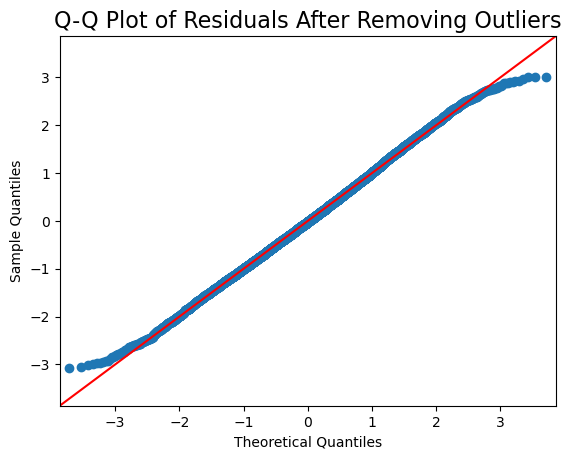

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'data_export.csv'
df = pd.read_csv(file_path)

fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)


df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


df = df[df["cited_by_count"] > 0]


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


X = df[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y = df["log_cited_by_count"]


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

outlier_threshold = 3
non_outliers = np.abs(standardized_residuals) <= outlier_threshold


df_cleaned = df[non_outliers]


X_cleaned = df_cleaned[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y_cleaned = df_cleaned["log_cited_by_count"]


X_cleaned = sm.add_constant(X_cleaned)


model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()


print(model_cleaned.summary())

plt.figure(figsize=(8, 6))
sm.qqplot(model_cleaned.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals After Removing Outliers", fontsize=16)
plt.show()

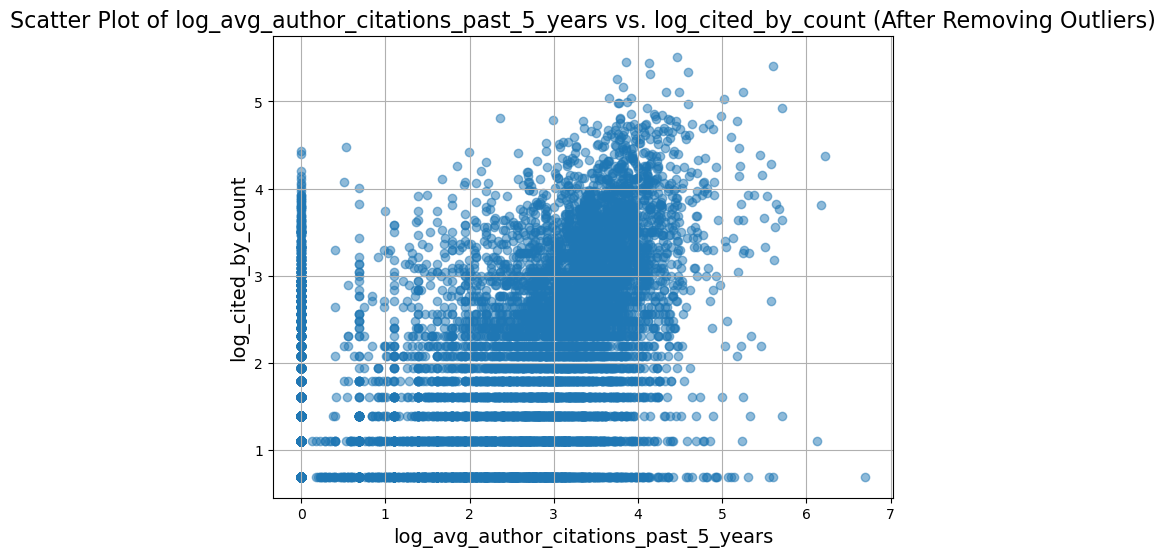

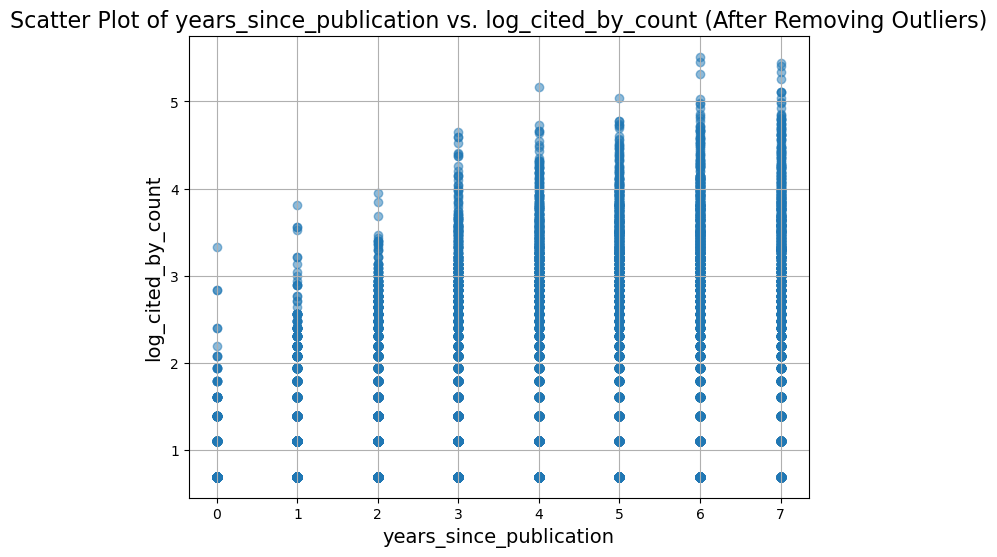

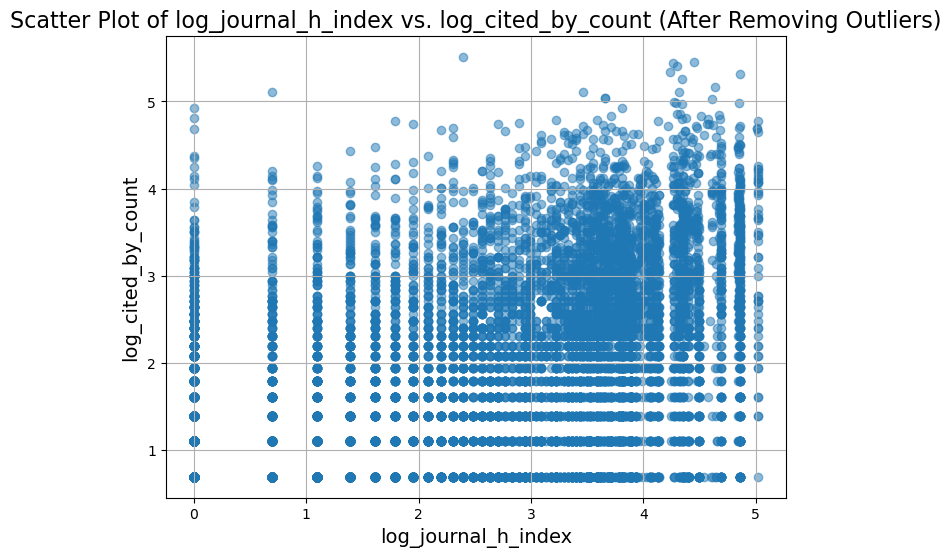

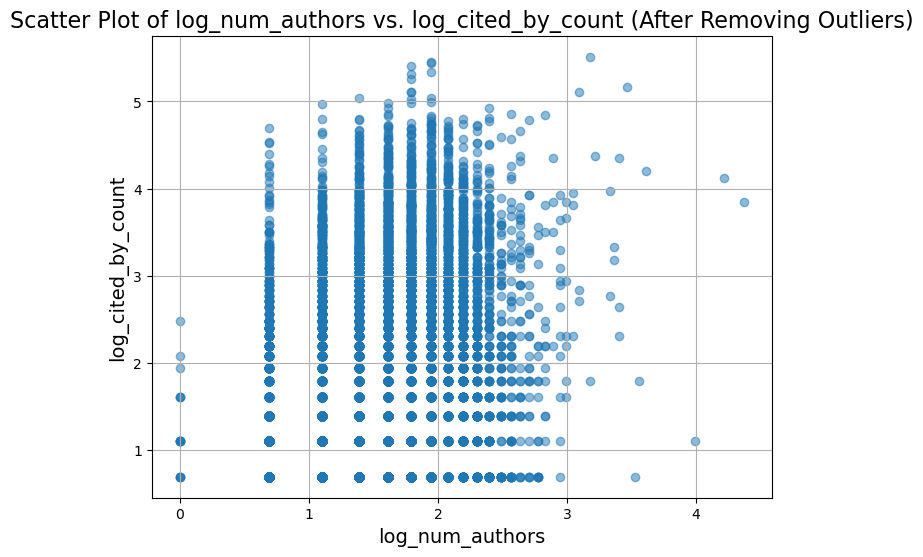

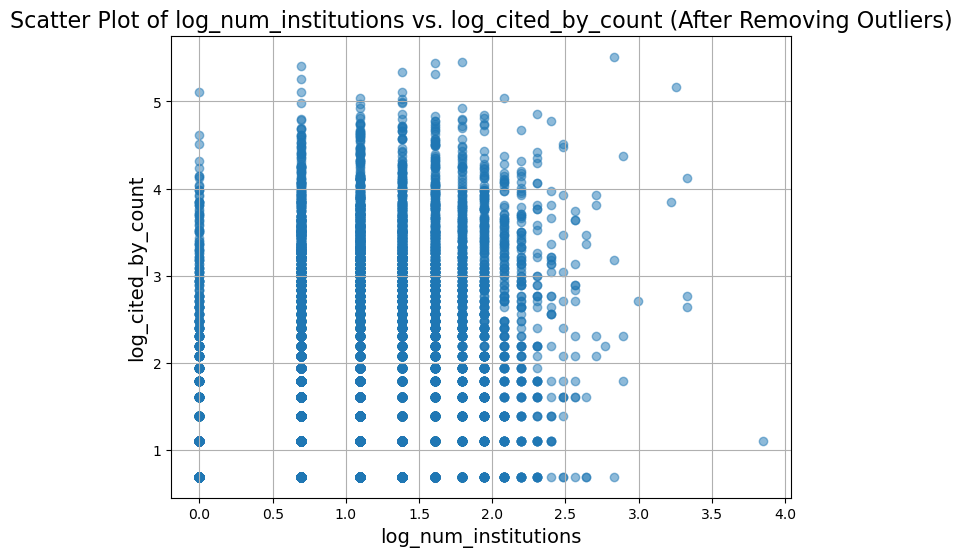

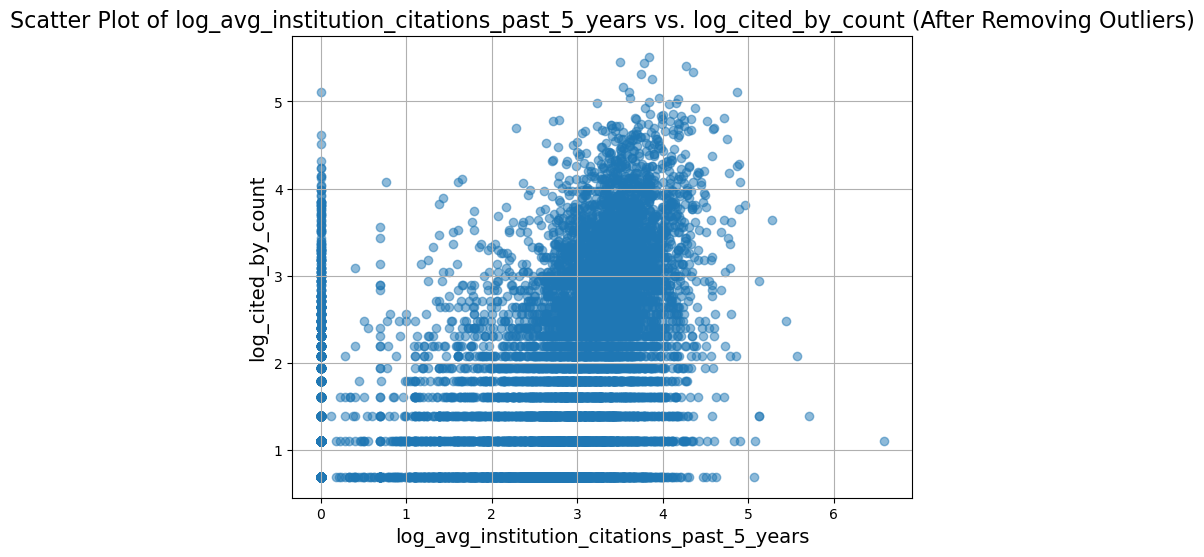

In [2]:

independent_vars = [
   "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned[var], y_cleaned, alpha=0.5)
    plt.title(f"Scatter Plot of {var} vs. log_cited_by_count (After Removing Outliers)", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("log_cited_by_count", fontsize=14)
    plt.grid(True)
    plt.show()

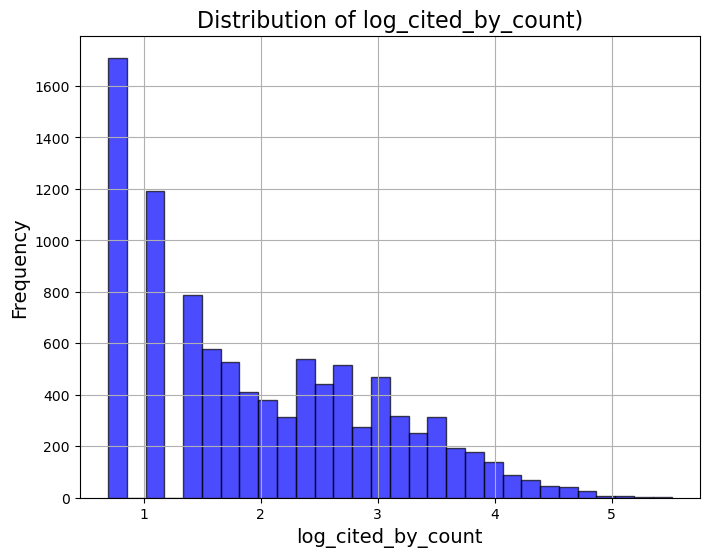

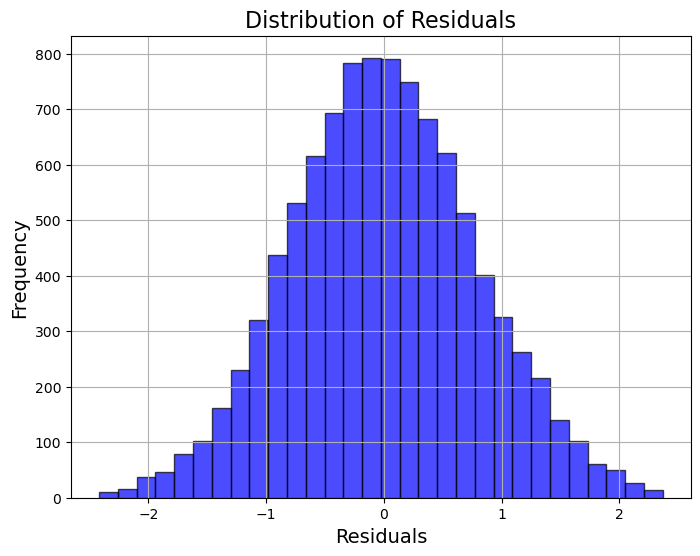

<Figure size 800x600 with 0 Axes>

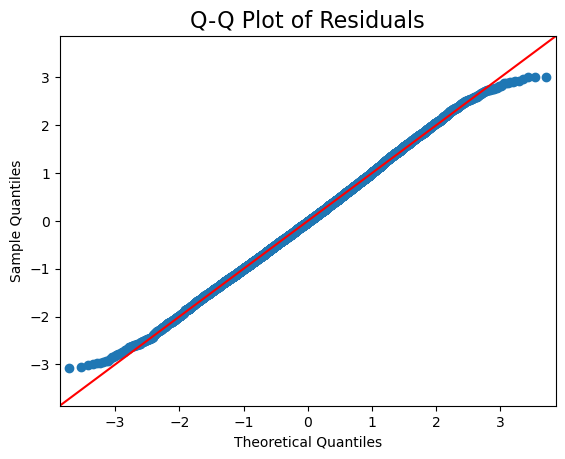

In [3]:
# Plot the distribution of y_cleaned to assess normality
plt.figure(figsize=(8, 6))
plt.hist(y_cleaned, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of log_cited_by_count)", fontsize=16)
plt.xlabel("log_cited_by_count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_cleaned - model_cleaned.predict(X_cleaned)

# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Generate a Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals", fontsize=16)
plt.show()

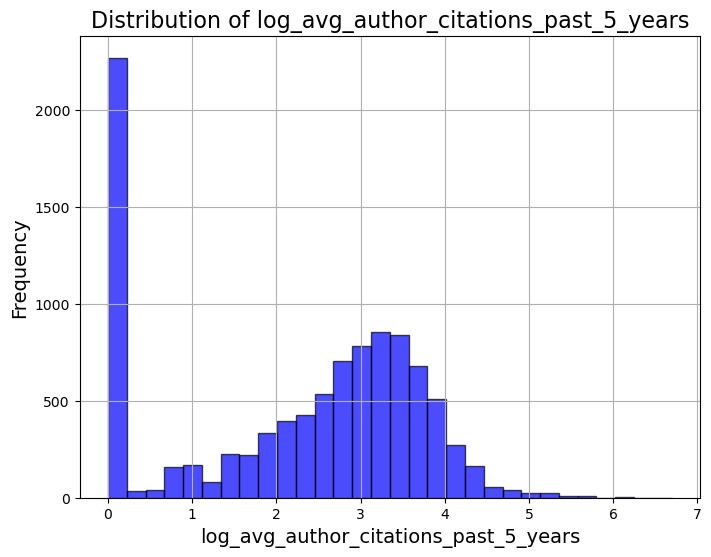

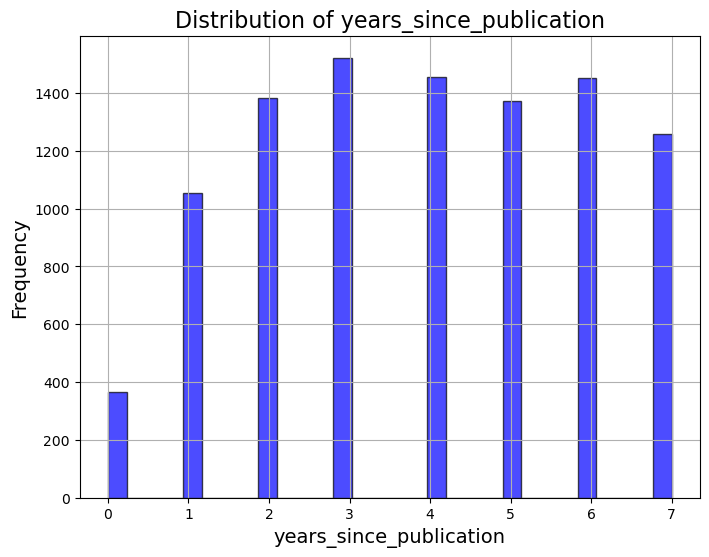

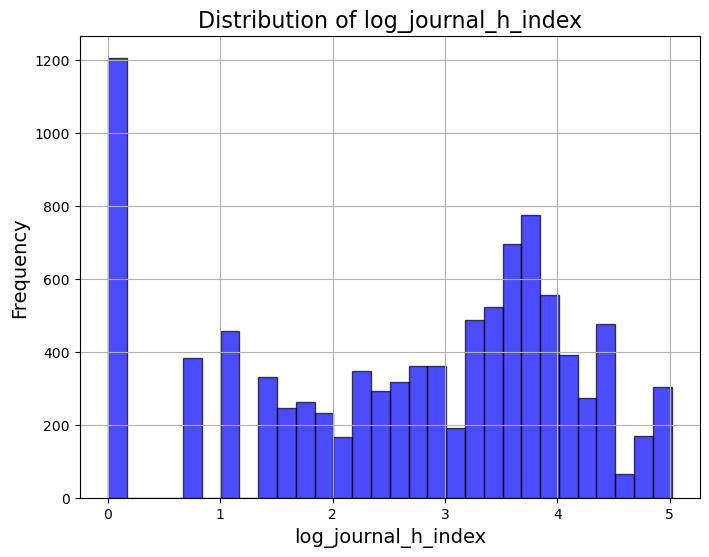

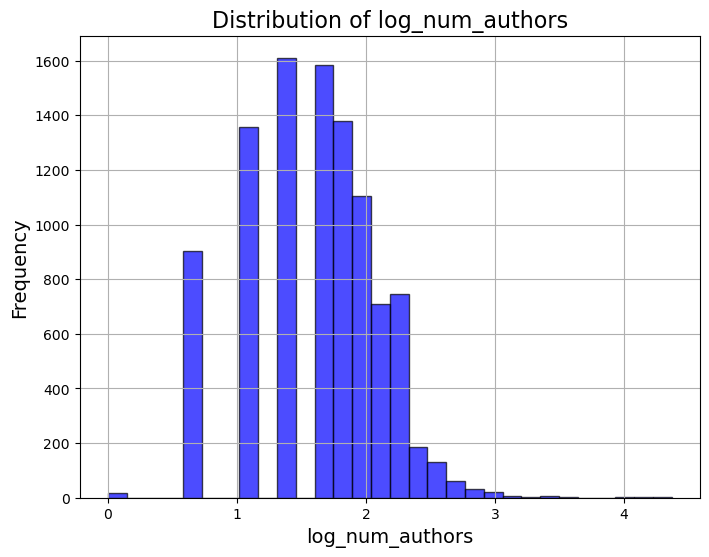

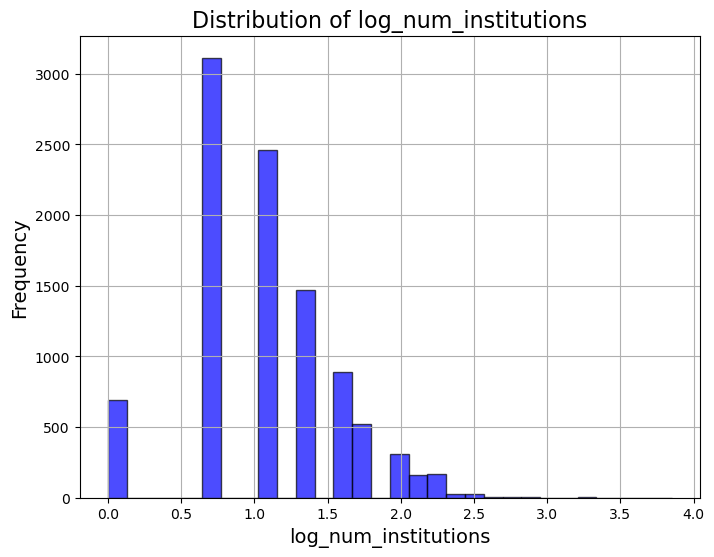

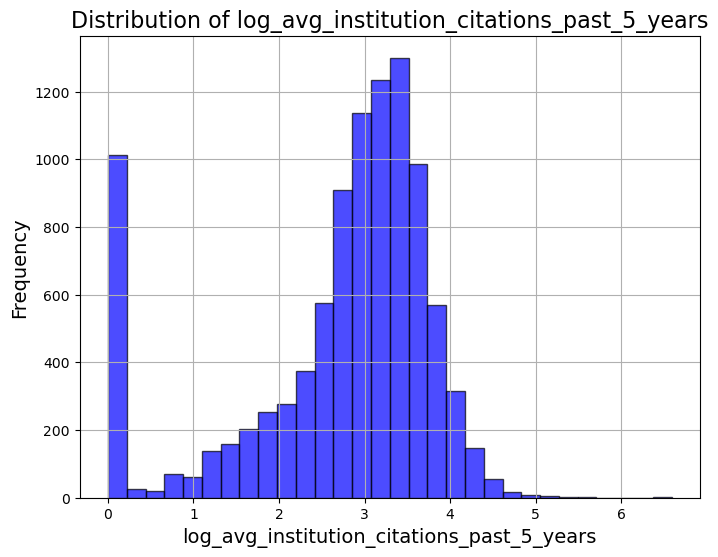

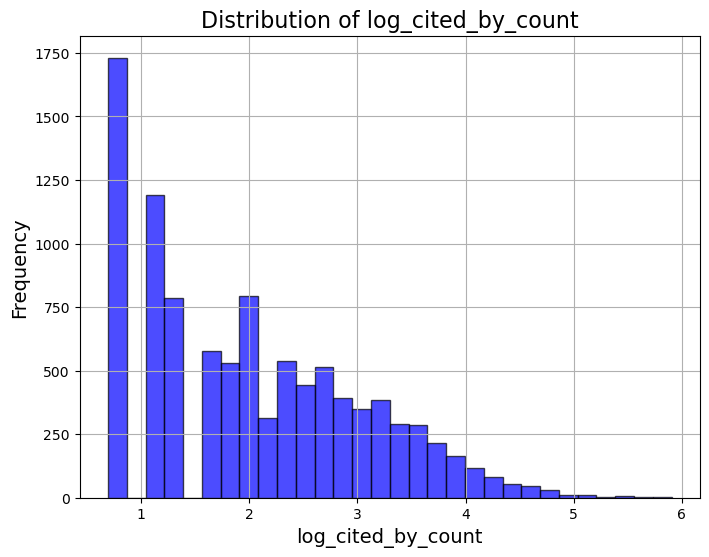

In [36]:
import matplotlib.pyplot as plt

# List of variables to plot
variables = [
   "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]

# Loop through each variable in X_initial and plot its distribution
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of {var}", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the distribution of the dependent variable y_initial
plt.figure(figsize=(8, 6))
plt.hist(y_initial, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of log_cited_by_count", fontsize=16)
plt.xlabel("log_cited_by_count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_export.csv'
df = pd.read_csv(file_path)


fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


df = df[df["cited_by_count"] > 0]


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


if "predicted_category" not in df.columns:
    raise ValueError("The dataset must contain a 'predicted_category' column.")


category_results = {}


for category in df["predicted_category"].unique():
    df_category = df[df["predicted_category"] == category]  

    X = df_category[[
        "log_avg_author_citations_past_5_years", 
        "years_since_publication", 
        "log_journal_h_index", 
        "log_num_authors", 
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years",
    ]]
    y = df_category["log_cited_by_count"]


    X = sm.add_constant(X)


    model = sm.OLS(y, X).fit()

    category_results[category] = model


    print(f"Category: {category}")
    print(model.summary())
    print("\n" + "="*80 + "\n")



Category: Physical Attributes
                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     518.5
Date:                Thu, 02 Jan 2025   Prob (F-statistic):               0.00
Time:                        21:45:37   Log-Likelihood:                -4312.2
No. Observations:                3779   AIC:                             8638.
Df Residuals:                    3772   BIC:                             8682.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

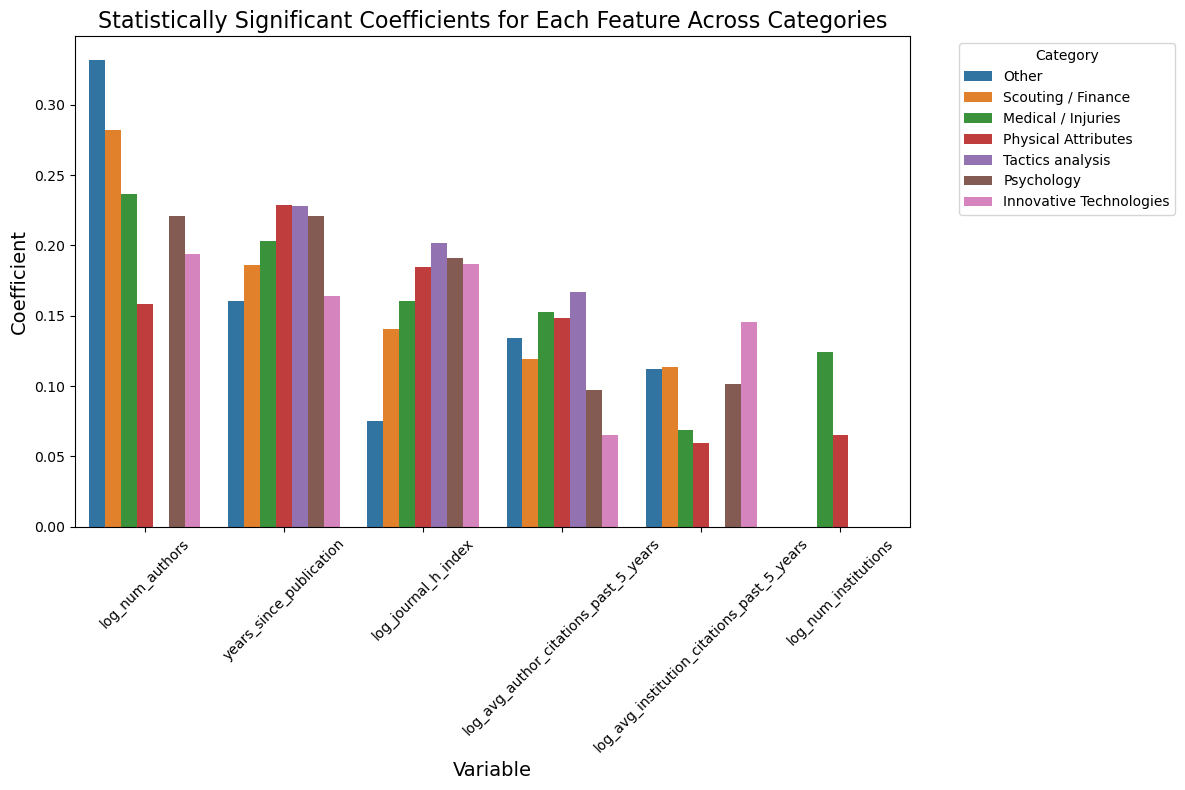

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


visualization_data = []

for category, results in category_results.items():
    for variable in [
        "log_avg_author_citations_past_5_years",
        "years_since_publication", 
        "log_journal_h_index",  
        "log_num_authors",      
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years" 
    ]:
        coef = results.params.get(variable, 0)  
        p_value = results.pvalues.get(variable, 1)  
        is_significant = p_value < 0.05  

   
        if is_significant:
            visualization_data.append({
                "Category": category,
                "Variable": variable,
                "Coefficient": coef
            })


coef_melted_with_significance = pd.DataFrame(visualization_data)


if not coef_melted_with_significance.empty:
    # Sort the data to have a clean, ordered plot
    coef_melted_with_significance.sort_values(by="Coefficient", ascending=False, inplace=True)


    plt.figure(figsize=(12, 8))  # Adjust for better readability

    sns.barplot(
        data=coef_melted_with_significance,
        x="Variable",
        y="Coefficient",
        hue="Category",
        dodge=True,
        palette="tab10"  
    )

    # Title and labels
    plt.title("Statistically Significant Coefficients for Each Feature Across Categories", fontsize=16)
    plt.xlabel("Variable", fontsize=14)
    plt.ylabel("Coefficient", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()
else:
    print("No significant coefficients to plot.")

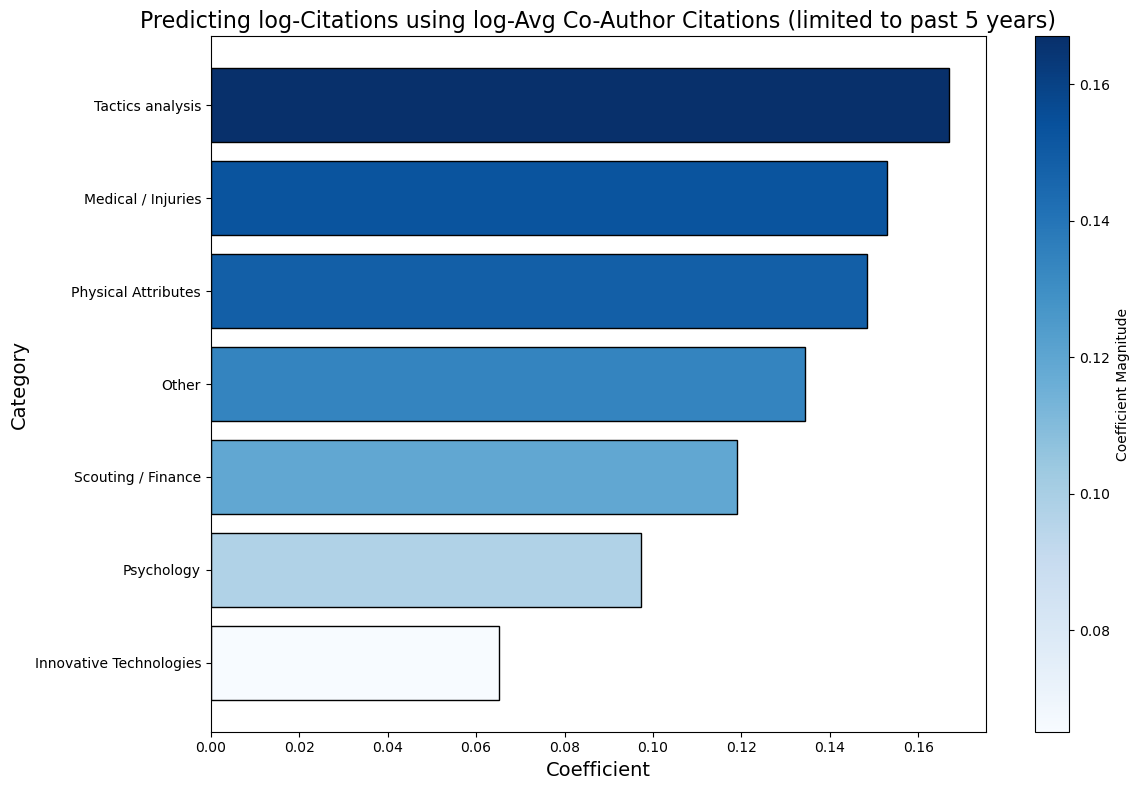

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as mcolors


visualization_data = []


for category, results in category_results.items():
    variable = "log_avg_author_citations_past_5_years" 
    coef = results.params.get(variable, 0)  
    p_value = results.pvalues.get(variable, 1)  
    is_significant = p_value < 0.05  

 
    if is_significant:
        visualization_data.append({
            "Category": category,
            "Coefficient": coef
        })


coef_melted_with_significance = pd.DataFrame(visualization_data)


if not coef_melted_with_significance.empty:

    coef_melted_with_significance = coef_melted_with_significance.sort_values(by="Coefficient", ascending=False)


    norm = mcolors.Normalize(vmin=coef_melted_with_significance["Coefficient"].min(),
                              vmax=coef_melted_with_significance["Coefficient"].max())
    color_map = cm.ScalarMappable(norm=norm, cmap="Blues")
    coef_melted_with_significance["Color"] = coef_melted_with_significance["Coefficient"].apply(
        lambda x: color_map.to_rgba(x))

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust vertical space for better readability
    for index, row in coef_melted_with_significance.iterrows():
        ax.barh(row["Category"], row["Coefficient"], color=row["Color"], edgecolor='black')


    ax.invert_yaxis()


    ax.set_title("Predicting log-Citations using log-Avg Co-Author Citations (limited to past 5 years)", fontsize=16)
    ax.set_xlabel("Coefficient", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)


    sm = cm.ScalarMappable(cmap="Blues", norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation="vertical", label="Coefficient Magnitude")

    plt.tight_layout()
    plt.show()
else:
    print("No significant coefficients to plot.")